In [13]:
from connection import DremioConnection
from amtest_configs import config
import seaborn as sns
import polars as pl

token = config['token']
url = 'grpc+tls://data.dremio.cloud:443'

In [16]:
## Establish Connection
dremio = DremioConnection(token, url)

## Run Query, Get Back Polars DF
df = dremio.toPolars('SELECT * FROM dremiocloud101."Weather_PRCP_Over1"')

## Print df
print(df)


shape: (1_522, 6)
┌─────────────────────────┬───────────┬──────────┬──────────┬───────────┬───────────┐
│ date                    ┆ awnd      ┆ prcp     ┆ snow     ┆ tempmax   ┆ tempmin   │
│ ---                     ┆ ---       ┆ ---      ┆ ---      ┆ ---       ┆ ---       │
│ datetime[ms]            ┆ f64       ┆ f64      ┆ f64      ┆ f64       ┆ f64       │
╞═════════════════════════╪═══════════╪══════════╪══════════╪═══════════╪═══════════╡
│ 2013-02-09 20:47:12.054 ┆ 11.613907 ┆ 1.711757 ┆ 0.134577 ┆ 67.161372 ┆ 21.216398 │
│ 2014-09-29 03:12:41.036 ┆ 2.951145  ┆ 1.711623 ┆ 0.075035 ┆ 53.120871 ┆ 26.465267 │
│ 2014-11-26 22:29:17.629 ┆ 2.014154  ┆ 1.747144 ┆ 0.042906 ┆ 54.024588 ┆ 30.548978 │
│ 2014-06-19 11:40:01.293 ┆ 4.876666  ┆ 1.735431 ┆ 0.282389 ┆ 48.426897 ┆ 37.014052 │
│ …                       ┆ …         ┆ …        ┆ …        ┆ …         ┆ …         │
│ 2014-06-09 19:39:11.242 ┆ 11.207169 ┆ 1.156399 ┆ 0.041152 ┆ 96.580112 ┆ 16.005481 │
│ 2013-01-24 23:53:10.793 ┆ 8.863728

[Text(0.5, 1.0, 'Precipitation by Date')]

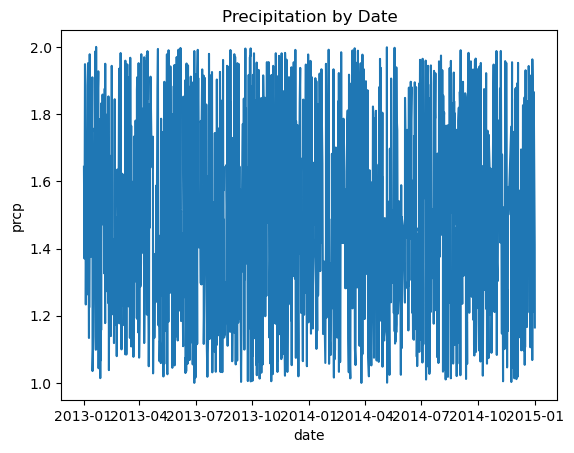

In [17]:
sns.lineplot(data=df, x="date", y="prcp").set(title="Precipitation by Date")